Column names in the dataset:
['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History', 'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar', 'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease']
Encoding categorical column: Gender
Encoding categorical column: Smoking
Encoding categorical column: Alcohol Intake
Encoding categorical column: Family History
Encoding categorical column: Diabetes
Encoding categorical column: Obesity
Encoding categorical column: Exercise Induced Angina
Encoding categorical column: Chest Pain Type

Decision Tree Results:
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


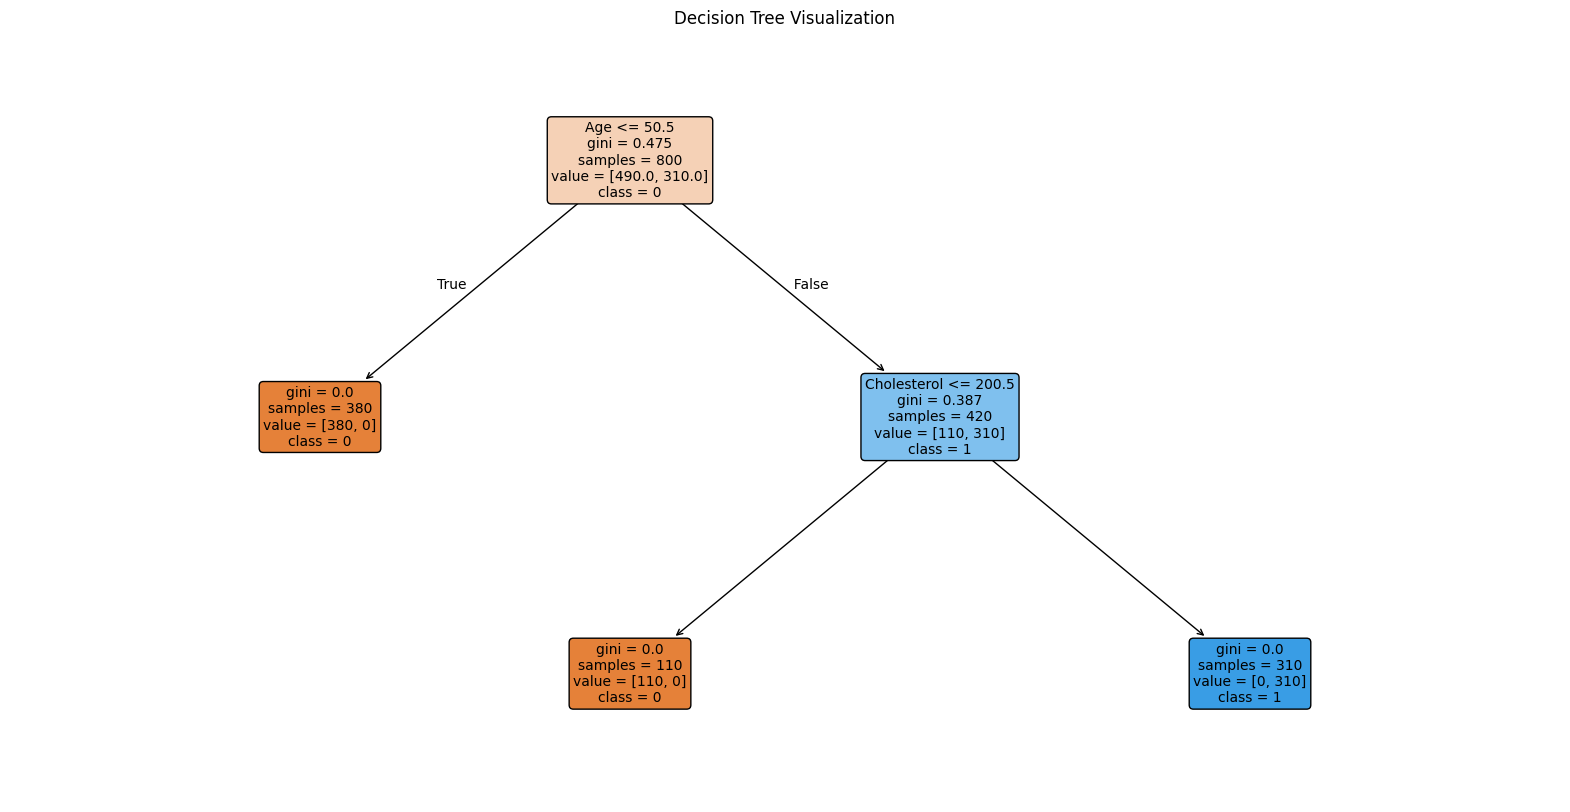

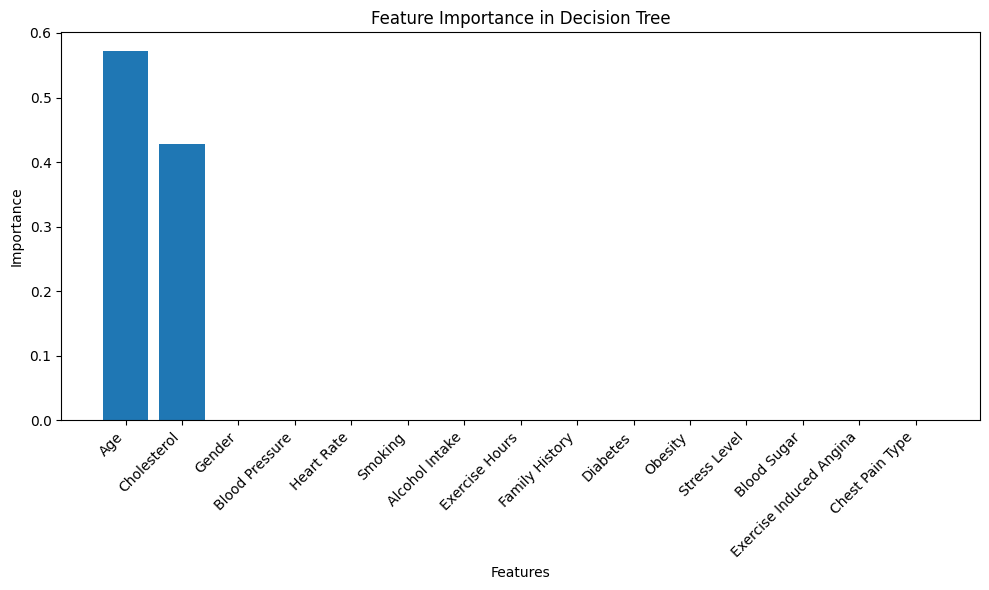


Feature Importance Rankings:
Age: 0.5724
Cholesterol: 0.4276
Gender: 0.0000
Blood Pressure: 0.0000
Heart Rate: 0.0000
Smoking: 0.0000
Alcohol Intake: 0.0000
Exercise Hours: 0.0000
Family History: 0.0000
Diabetes: 0.0000
Obesity: 0.0000
Stress Level: 0.0000
Blood Sugar: 0.0000
Exercise Induced Angina: 0.0000
Chest Pain Type: 0.0000


In [9]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/heart_disease_dataset.csv')

# Display column names
print("Column names in the dataset:")
print(df.columns.tolist())

# Create a copy of the dataframe
df_encoded = df.copy()

# Encode categorical variables
le = LabelEncoder()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        print(f"Encoding categorical column: {column}")
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Separate features and target
X = df_encoded.iloc[:, :-1]  # All columns except the last one
y = df_encoded.iloc[:, -1]   # Last column as target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting depth for better visualization
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Print classification results
print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, dt_predictions):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_predictions))

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['0', '1'],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Print feature importance values
print("\nFeature Importance Rankings:")
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")